In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
pip install xlrd


In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

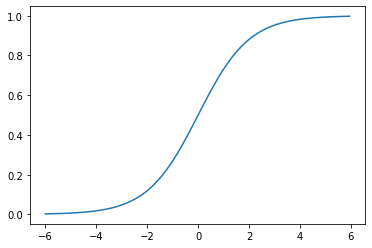

In [7]:
x=np.arange(-6,6,0.05)
plt.plot(x,sigmoid(x))
plt.show()

In [9]:
pip install openpyxl


  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [10]:

df = pd.read_excel("Social_Network_Ads.xlsx", engine='openpyxl')
print(df.head())


   Age  Salary  Purchased
0   19   19000          0
1   35   20000          0
2   26   43000          0
3   47   25000          1
4   27   57000          0


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:

X= df.iloc[:,[0,1]].values
y=df.iloc[:,-1].values
print(X.shape,y.shape)

(284, 2) (284,)


In [13]:
sc=StandardScaler()
X_sc=sc.fit_transform(X)
X_sc.shape

(284, 2)

In [16]:
X_sc[:5]

array([[-2.13648148, -1.50856282],
       [-0.56456246, -1.48090064],
       [-1.44876691, -0.8446705 ],
       [ 0.6143768 , -1.34258974],
       [-1.35052197, -0.45739999]])

In [17]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X_sc,
                 y,
                test_size = 0.2,
                random_state = 100)

In [29]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(227, 2) (57, 2) (227,) (57,)


In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [32]:
y_pred.shape

(57,)

In [33]:
y_pred = model.predict(X_test)

In [34]:
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[20  5]
 [ 7 25]]


In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        25
           1       0.83      0.78      0.81        32

    accuracy                           0.79        57
   macro avg       0.79      0.79      0.79        57
weighted avg       0.79      0.79      0.79        57

